# 공공 인공지능 Open API 활용

### 동물원이미지 _사람, 기린인식

In [3]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [4]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [5]:
import os
img_file = 'images/zoo.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [6]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:] 
# jfif 파일은 jpg로 image_type을 설정하고, 아니면 .을 제외한 나머지가 image_type
image_type

'jpg'

In [7]:
with open(img_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode("utf8")

In [8]:
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents 
    }
}

In [9]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [10]:
print("[responseCode] " + str(response.status))  
#  response.status = 200 이면 정상작동을 의미

[responseCode] 200


In [11]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.931413","x":"506","y":"10","width":"86","height":"104"},{"class":"person","confidence":"0.903477","x":"432","y":"377","width":"71","height":"109"},{"class":"person","confidence":"0.902618","x":"486","y":"77","width":"105","height":"114"},{"class":"person","confidence":"0.902347","x":"390","y":"67","width":"68","height":"123"},{"class":"person","confidence":"0.863106","x":"365","y":"421","width":"96","height":"81"},{"class":"person","confidence":"0.861665","x":"612","y":"36","width":"55","height":"87"},{"class":"person","confidence":"0.821073","x":"451","y":"78","width":"48","height":"107"},{"class":"person","confidence":"0.764306","x":"559","y":"404","width":"41","height":"71"},{"class":"person","confidence":"0.728634","x":"565","y":"71","width":"84","height":"109"},{"class":"person","confidence":"0.694804","x":"738","y":"392","width":"59","height":"85"},{"class":"person","confidence":"0.688483","x":"572","y":"425

In [12]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.931413',
    'x': '506',
    'y': '10',
    'width': '86',
    'height': '104'},
   {'class': 'person',
    'confidence': '0.903477',
    'x': '432',
    'y': '377',
    'width': '71',
    'height': '109'},
   {'class': 'person',
    'confidence': '0.902618',
    'x': '486',
    'y': '77',
    'width': '105',
    'height': '114'},
   {'class': 'person',
    'confidence': '0.902347',
    'x': '390',
    'y': '67',
    'width': '68',
    'height': '123'},
   {'class': 'person',
    'confidence': '0.863106',
    'x': '365',
    'y': '421',
    'width': '96',
    'height': '81'},
   {'class': 'person',
    'confidence': '0.861665',
    'x': '612',
    'y': '36',
    'width': '55',
    'height': '87'},
   {'class': 'person',
    'confidence': '0.821073',
    'x': '451',
    'y': '78',
    'width': '48',
    'height': '107'},
   {'class': 'person',
    'confidence': '0.764306',
    'x': '559',
    'y': '404',


In [18]:
obj_list = result['return_object']['data']
obj_list

[{'class': 'person',
  'confidence': '0.931413',
  'x': '506',
  'y': '10',
  'width': '86',
  'height': '104'},
 {'class': 'person',
  'confidence': '0.903477',
  'x': '432',
  'y': '377',
  'width': '71',
  'height': '109'},
 {'class': 'person',
  'confidence': '0.902618',
  'x': '486',
  'y': '77',
  'width': '105',
  'height': '114'},
 {'class': 'person',
  'confidence': '0.902347',
  'x': '390',
  'y': '67',
  'width': '68',
  'height': '123'},
 {'class': 'person',
  'confidence': '0.863106',
  'x': '365',
  'y': '421',
  'width': '96',
  'height': '81'},
 {'class': 'person',
  'confidence': '0.861665',
  'x': '612',
  'y': '36',
  'width': '55',
  'height': '87'},
 {'class': 'person',
  'confidence': '0.821073',
  'x': '451',
  'y': '78',
  'width': '48',
  'height': '107'},
 {'class': 'person',
  'confidence': '0.764306',
  'x': '559',
  'y': '404',
  'width': '41',
  'height': '71'},
 {'class': 'person',
  'confidence': '0.728634',
  'x': '565',
  'y': '71',
  'width': '84',
  

## 시각화

In [19]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

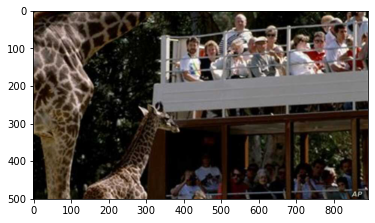

In [20]:
image = Image.open( img_file )
plt.imshow(image)
plt.show()

In [21]:
draw = ImageDraw.Draw(image)
for i in range(len(obj_list)):
    obj = obj_list[i]
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text( (x,y), name, font= ImageFont.truetype('malgun.ttf',20), fill = (255,0,0) )
    draw.rectangle(((x,y),(x+w, y+h)), outline =(255,0,0),width =2)

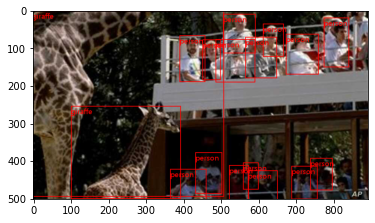

In [22]:
plt.imshow(image)
plt.show()